## Project: 2
### Predicting Players ratings:

In [1]:

# References:
#i) https://github.com/iphton/Data-Science-In-Python/Python for Data Science/Soocer Data Analysis 
## - kaggle/Soccer Data Analysis.ipynb 
#ii) https://jiayiwangjw.github.io/2017/06/12/SoccerDataAnalysis/

In [2]:
# import necessary Library:
import sqlite3 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
import numpy as np

In [4]:
# Reading Data from the database into pandas:
# creating teh connection:
conn=sqlite3.connect("database.sqlite")
df=pd.read_sql_query("Select * from Player_Attributes",conn)

#### Exploring Data:

In [5]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [6]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

## Columns in Here are: 
id

player_fifa_api_idFIFA ID

player_api_idAPI Id for player

dateDate of match

overall_ratingRating

potentialPotential rating

preferred_footLeft or Right foot

attacking_work_rateAttacking rate

defensive_work_rateDefensive rate

crossingFIFA rating for crossing

finishingFIFA rating for finishing 

heading_accuracyFIFA rating for heading accuracy 

short_passingFIFA rating for short passes

volleysFIFA rating for handling volleys

dribblingFIFA rating for dribbling

curveFIFA rating for curves

free_kick_accuracyFIFA rating for free kick accuracy

long_passingFIFA rating for long passes

ball_controlFIFA rating for ball control

accelerationFIFA rating for player acceleration

sprint_speedFIFA rating for sprint speed

agilityFIFA rating for player agility

reactionsFIFA rating for reactions

balanceFIFA rating for player balance

shot_powerFIFA rating for shot power

jumpingFIFA rating for jumping

stamina

strength

long_shots

aggression

interceptions

positioning

visionFIFAs rating on ability to see own players on field. If vision is low, it does not matter how good long passing is

penaltiesFIFAs rating for accuracy of shots from inside penalty area

marking

standing_tackle

sliding_tackle

gk_divingFIFA rating for goal keeper diving

gk_handlingFIFA rating for goal keeper handling

gk_kickingFIFA rating for goal keeper kicking

gk_positioning

gk_reflexes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [8]:
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


#### Data Cleaning:

In [9]:
# check if it is null
df.isnull().any()

id                     False
player_fifa_api_id     False
player_api_id          False
date                   False
overall_rating          True
potential               True
preferred_foot          True
attacking_work_rate     True
defensive_work_rate     True
crossing                True
finishing               True
heading_accuracy        True
short_passing           True
volleys                 True
dribbling               True
curve                   True
free_kick_accuracy      True
long_passing            True
ball_control            True
acceleration            True
sprint_speed            True
agility                 True
reactions               True
balance                 True
shot_power              True
jumping                 True
stamina                 True
strength                True
long_shots              True
aggression              True
interceptions           True
positioning             True
vision                  True
penalties               True
marking       

In [10]:
df.shape

(183978, 42)

In [11]:
#Now let’s try to find how many data points in each column are null.
## df.isnull().sum(axis=0)  we can do this also.

In [12]:
# We can check it with heatmap also
import seaborn as sns


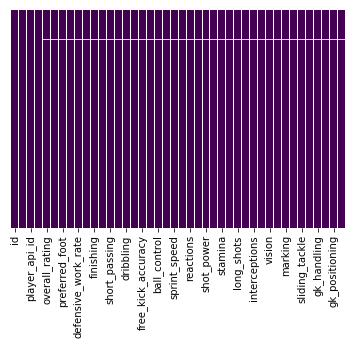

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
## dark yellow color = is yes the column value have the missing value.
## we see some ofcolumns have missing value 

In [14]:
df.dropna(inplace=True)

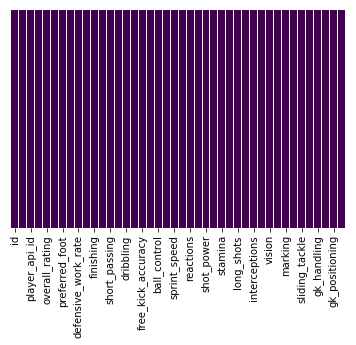

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
## The results shows there is no more nan values on dataframe.

In [16]:
## to check presence of catergorical coloumns datatype
df.select_dtypes(exclude=['int64', 'float64']).columns

# df.select_dtypes(include=['int', 'float']).columns   for presence of Numerical datatype

Index(['date', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate'], dtype='object')

In [17]:
# or
df.select_dtypes(include=['object']).columns

Index(['date', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate'], dtype='object')

In [18]:
df.dtypes

id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision  

In [19]:
## This will give an array of all the categorical variables in a dataframe.
df.select_dtypes(include=['O']).columns.values

array(['date', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate'], dtype=object)

In [20]:
# Since we have found the catergorical column, here we don't need date
df.drop('date',axis=1,inplace=True)

In [21]:
df.head(5)

,id,player_fifa_api_id,player_api_id,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,62.0,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [22]:
#  Note: Shuffle the rows of df so we get a distributed sample when we display top few rows

## df = df.reindex(np.random.permutation(df.index))

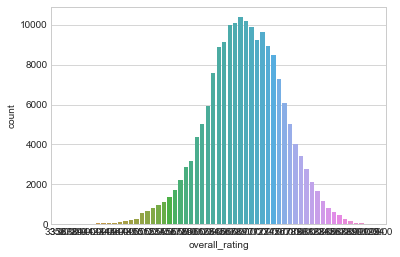

In [23]:
## more plot to check
sns.set_style ('whitegrid')

sns.countplot(x='overall_rating',data=df)
# it shows the normal distribution:

In [24]:
# Let set the variable:
X= df.drop('overall_rating',axis=1)
y=y=df['overall_rating']

In [25]:
X.head(3)

,id,player_fifa_api_id,player_api_id,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,71.0,right,medium,medium,49.0,44.0,71.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,71.0,right,medium,medium,49.0,44.0,71.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,66.0,right,medium,medium,49.0,44.0,71.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0


I tried to encodinig categorical data but it is not necessay:

Below is the sample that  can be done to Encode categorical data features:

In [26]:
# Encoding categorical data
## from sklearn.preprocessing import LabelEncoder,OneHotEncoder
## labelencoder=LabelEncoder()
## X[:,4:7]=labelencoder.fit_transform(X[:,4:7])
## onehotencoder=OneHotEncoder(categorical_features=[4,5,6])
## X=onehotencoder.fit_transform(X).toarray()

Here we are interested in predicting players rating based on different columns of data:

Let see rating with reference to other columns:

Note: From this point on, we will start referring to the columns as "features" in our description.

In [27]:
df[:10][['penalties', 'overall_rating']]

,penalties,overall_rating
0,48.0,67.0
1,48.0,67.0
2,48.0,62.0
3,47.0,61.0
4,47.0,61.0
5,59.0,74.0
6,59.0,74.0
7,59.0,73.0
8,59.0,73.0
9,59.0,73.0



### Feature Correlation Analysis¶ 
 we saw  'penalties' and 'overall_rating' in above cell. Now, we will see if  'penalties' is correlated to 'overall_rating'. We are using a similar selection operation, but this time for all the rows and within the correlation function.

In [28]:
df['overall_rating'].corr(df['penalties'])

0.39271510791118897

We see that Pearson’s Correlation Coefficient for these two columns is 0.39. 

Pearson goes from -1 to +1. A value of 0 would have told there is no correlation, so we shouldn’t bother looking at that attribute. A value of 0.39 shows some correlation, although it could be stronger. 

At least, we have these attributes which are slightly correlated. This gives us hope that we might be able to build a meaningful predictor using these ‘weakly’ correlated features.

Next, we will create a list of features that we would like to iterate the same operation on.
Now Creating  a list of potential Features that  measures correlation with.

In [29]:
potential_Features = ['acceleration', 'curve', 'free_kick_accuracy', 'ball_control', 'shot_power',
                     'stamina']


In [30]:
# check how the features are correlated with the overall ratings
for cor in potential_Features:
    related = df['overall_rating'].corr(df[cor])
    print("%s: %f" % (cor,related))

acceleration: 0.243998
curve: 0.357566
free_kick_accuracy: 0.349800
ball_control: 0.443991
shot_power: 0.428053
stamina: 0.325606


#### let see which features have high correlation with 'overall_rating':
Looking at the values printed by the previous cell, we notice that are:  two are "ball_control" (0.443) and "shot_power" (0.428). So these two features seem to have higher correlation with "overall_rating".

### Data Visualization:
Next we will start plotting the correlation coefficients of each feature with "overall_rating". We start by selecting the columns and creating a list with correlation coefficients, called "correlations". 

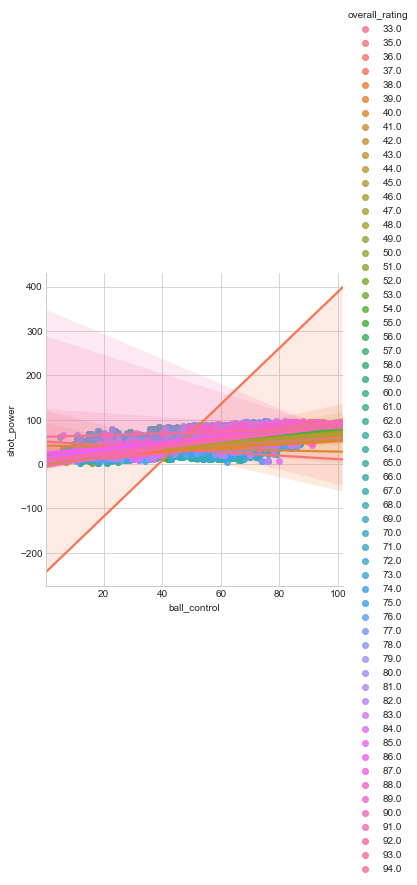

In [31]:
sns.lmplot(x="ball_control",y="shot_power",data=df,hue='overall_rating')

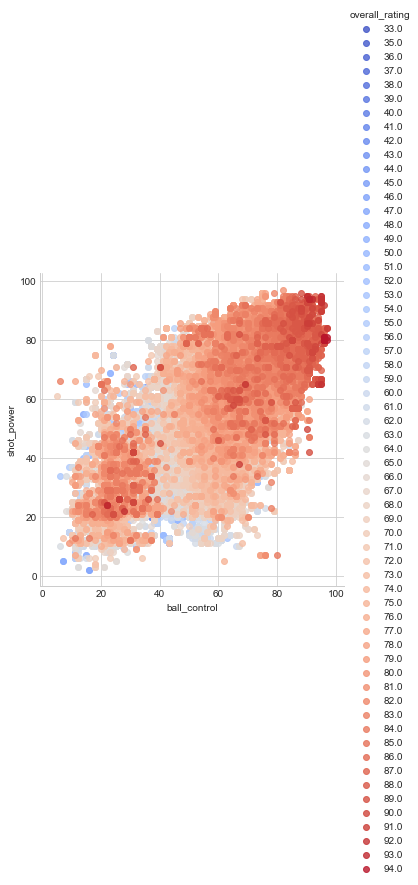

In [33]:
# we don't use the linear form. we need scatter then
sns.lmplot(x="ball_control",y="shot_power",data=df,hue='overall_rating',fit_reg=False,
           palette='coolwarm')

In [36]:
cols = ['potential',  'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [38]:
# create a list containing Pearson's correlation between 'overall_rating' with each column in cols
correlations = [ df['overall_rating'].corr(df[cor]) for cor in cols ]

In [39]:
## Now make sure that the number of selected features and the correlations calculated are the same:
len(cols),len(correlations)

(34, 34)

In [43]:
import matplotlib.pyplot as plt

In [47]:
# create a function for plotting a dataframe with string columns and numeric values

def plot_dataframe(df, y_label):  
    color='blue'
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    plt.ylabel(y_label)

    ax = df.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attributes, rotation=75); #Notice the ; (remove it and see what happens !)
    plt.show()

In [48]:
# create a dataframe using cols and correlations

df2 = pd.DataFrame({'attributes': cols, 'correlation': correlations})

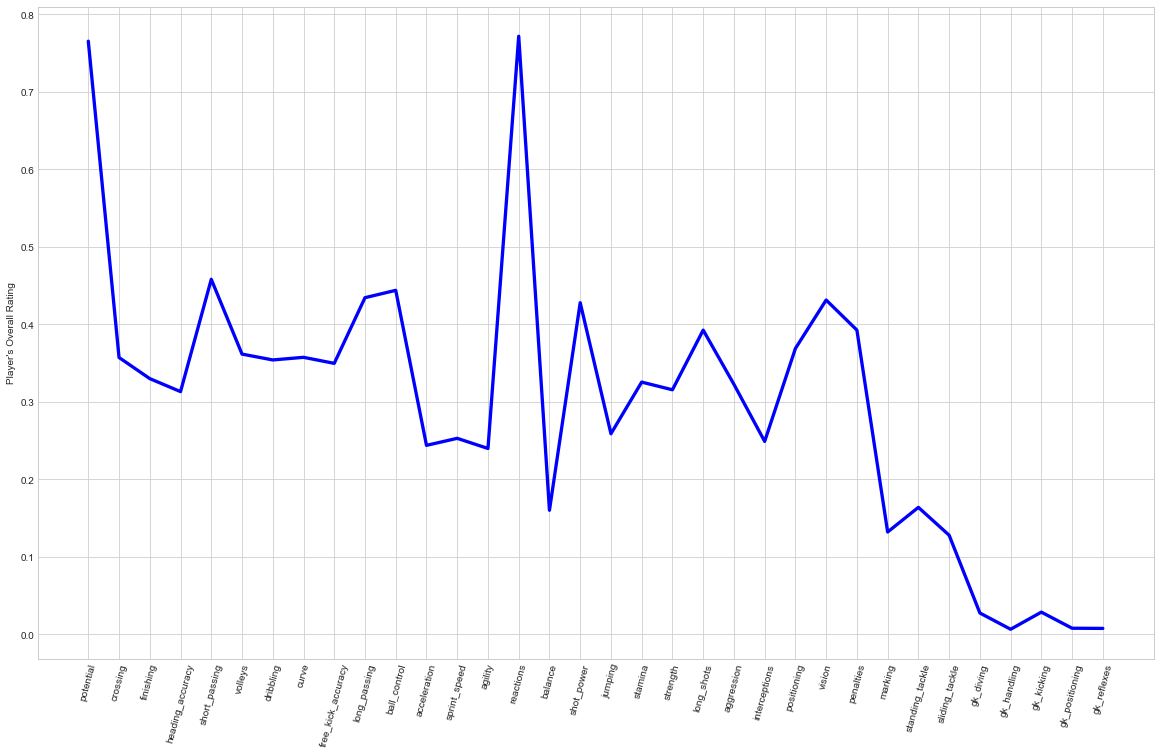

In [49]:
# let's plot above dataframe using the function we created
    
plot_dataframe(df2, 'Player\'s Overall Rating')

### Analysis of Findings

Now it is time for you to analyze what we plotted. Suppose you have to predict a player’s overall rating. Which 5 player attributes would you ask for? 
`Hint: Which are the five features with highest correlation coefficients?`

#### Clustering Players into Similar Groups
Until now, we used basic statistics and correlation coefficients to start forming an opinion, but can we do better? What if we took some features and start looking at each player using those features? Can we group similar players based on these features? Let’s see how we can do this.

`Note: Generally, someone with domain knowledge needs to define which features. We could have also selected some of the features with highest correlation with overall_rating. However, it does not guarantee best outcome always as we are not sure if the top five features are independent. For example, if 4 of the 5 features depend on the remaining 1 feature, taking all 5 does not give new information.`

Select Features on Which to Group Players

In [50]:
#  Define the features we want to use for grouping players

select5features = ['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']
select5features

['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']

In [51]:
# Generate a new dataframe by selecting these features we just defined

df_select = df[select5features].copy(deep=True)

In [52]:
df_select.head(3)

,gk_kicking,potential,marking,interceptions,standing_tackle
0,10.0,71.0,65.0,70.0,69.0
1,10.0,71.0,65.0,70.0,69.0
2,10.0,66.0,65.0,41.0,66.0



#### Perform KMeans Clustering
Now we will use a machine learning method called KMeans to cluster the values (i.e., player features on gk_kicking, potential, marking, interceptions, and standing_tackle). 

In [57]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

In [58]:
# Perform scaling on the dataframe containing the features

data = scale(df_select)

# Define number of clusters
noOfClusters = 5

# Train a model
model = KMeans(init='k-means++', n_clusters=noOfClusters, n_init=20).fit(data)

In [59]:

print(100*'_')
print("\nCount of players in each cluster")
print(100*'_')

pd.value_counts(model.labels_, sort=False)

____________________________________________________________________________________________________

Count of players in each cluster
____________________________________________________________________________________________________


0    55680
1    14653
2    19985
3    43567
4    46469
dtype: int64